### **Using Maching learning Algorithms to Detect Frauds in Financial Tranactions of FastTag.**



In [37]:
#IMPORTING LIBRARIES
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [38]:
df = pd.read_csv("FastagFraudDetection.csv")

In [39]:
df.sample(10)

,Transaction_ID,Timestamp,Vehicle_Type,FastagID,TollBoothID,Lane_Type,Vehicle_Dimensions,Transaction_Amount,Amount_paid,Geographical_Location,Vehicle_Speed,Vehicle_Plate_Number,Fraud_indicator
1716,1717,8/31/2023 8:45,Car,FTG-319-OPQ-234,A-101,Express,Small,70,70,"12.936687032945434, 77.53113977439017",38,KA37UV2345,Not Fraud
958,959,1/4/2023 8:25,SUV,FTG-811-QWE-982,B-102,Express,Large,130,130,"13.042660878688794, 77.47580097259879",58,KA95AB2245,Not Fraud
2593,2594,12/17/2023 2:55,Motorcycle,NaN,D-104,Regular,Small,0,0,"13.059816123454882, 77.77068662374292",83,KA56NB0123,Not Fraud
2823,2824,11/28/2023 7:18,Car,FTG-324-CGE-098,A-101,Regular,Small,120,90,"13.059816123454882, 77.77068662374292",78,KA54DE4567,Fraud
1110,1111,5/28/2023 1:40,Van,FTG-667-ZAB-890,B-102,Express,Medium,130,100,"12.84197701525119, 77.67547528176169",54,KA56ST8801,Fraud
758,759,5/30/2023 9:45,Motorcycle,NaN,D-106,Regular,Small,0,0,"13.042660878688794, 77.47580097259879",32,KA89CD6799,Not Fraud
4981,4982,5/9/2023 21:26,Truck,FTG-221-ZXC-987,C-103,Regular,Large,330,330,"13.21331620748757, 77.55413526894684",96,AP89QR6789,Not Fraud
3824,3825,9/18/2023 19:44,Car,FTG-110-MVO-210,A-101,Express,Small,100,100,"12.84197701525119, 77.67547528176169",67,TN90YZ4567,Not Fraud
6,7,1/12/2023 15:40,SUV,FTG-707-JKL-210,B-102,Express,Large,180,160,"13.059816123454882, 77.77068662374292",70,KA22MN4567,Fraud
1175,1176,8/1/2023 3:40,SUV,FTG-502-MNO-345,B-102,Regular,Large,150,150,"12.84197701525119, 77.67547528176169",86,GA48YZ9012,Not Fraud


In [40]:
df.shape

(5000, 13)

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Transaction_ID         5000 non-null   int64 
 1   Timestamp              5000 non-null   object
 2   Vehicle_Type           5000 non-null   object
 3   FastagID               4451 non-null   object
 4   TollBoothID            5000 non-null   object
 5   Lane_Type              5000 non-null   object
 6   Vehicle_Dimensions     5000 non-null   object
 7   Transaction_Amount     5000 non-null   int64 
 8   Amount_paid            5000 non-null   int64 
 9   Geographical_Location  5000 non-null   object
 10  Vehicle_Speed          5000 non-null   int64 
 11  Vehicle_Plate_Number   5000 non-null   object
 12  Fraud_indicator        5000 non-null   object
dtypes: int64(4), object(9)
memory usage: 507.9+ KB


### **Data Preprocessing**

Checking if any null values exist in the dataset

In [42]:
df.isnull().mean()*100

,0
Transaction_ID,0.00
Timestamp,0.00
Vehicle_Type,0.00
FastagID,10.98
TollBoothID,0.00
Lane_Type,0.00
Vehicle_Dimensions,0.00
Transaction_Amount,0.00
Amount_paid,0.00
Geographical_Location,0.00


In [43]:
df['FastagID'] = df['FastagID'].fillna(0)

In [44]:
df.isnull().mean()*100

,0
Transaction_ID,0.0
Timestamp,0.0
Vehicle_Type,0.0
FastagID,0.0
TollBoothID,0.0
Lane_Type,0.0
Vehicle_Dimensions,0.0
Transaction_Amount,0.0
Amount_paid,0.0
Geographical_Location,0.0


In [45]:
df.nunique()

,0
Transaction_ID,5000
Timestamp,4423
Vehicle_Type,7
FastagID,4452
TollBoothID,6
Lane_Type,2
Vehicle_Dimensions,3
Transaction_Amount,20
Amount_paid,23
Geographical_Location,5


In [46]:
df.duplicated().value_counts()

,count
False,5000


In [47]:
df.Fraud_indicator.value_counts()*100/len(df)

,count
Fraud_indicator,
Not Fraud,80.34
Fraud,19.66


In [48]:
df['state']= df['Vehicle_Plate_Number'].str.slice(0,2)
state_code_map = {
    'KA': 'Karnataka',
    'GA': 'Goa',
    'MH': 'Maharashtra',
    'AP': 'Andhra Pradesh',
    'TN': 'Tamil Nadu',
    'DL': 'Delhi',
    'KL': 'Kerala',
    'GJ': 'Gujarat',
    'TS': 'Telangana',
    'UP': 'Uttar Pradesh',
    'RJ': 'Rajasthan',
    'WB': 'West Bengal',
    'MP': 'Madhya Pradesh',
    'HR': 'Haryana',
    'BR': 'Bihar'
}

df['state'] = df['state'].map(state_code_map)

In [49]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df['time-of-day']= df['Timestamp'].dt.hour
df['month'] = df['Timestamp'].dt.month


### **Data Visualization**

Text(0, 0.5, 'Fraud Indicator')

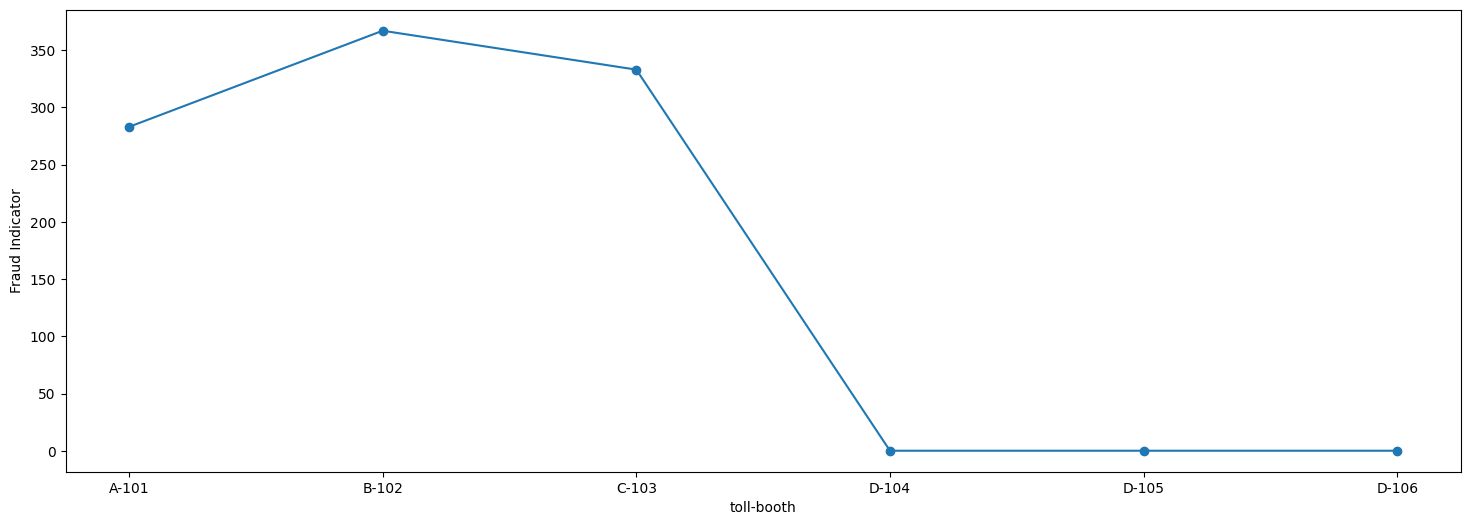

In [50]:
plt.figure(figsize=(18,6))
pd.crosstab(df['TollBoothID'], df['Fraud_indicator']).iloc[:, 0].plot(kind='line', marker='o')
plt.xlabel('toll-booth')
plt.ylabel('Fraud Indicator')





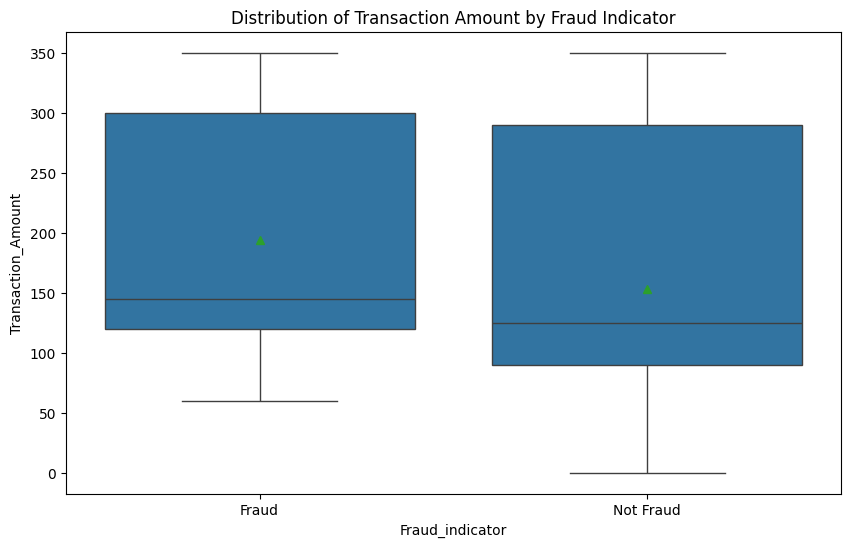

In [51]:
# Boxplot of transaction amount by fraud indicator
plt.figure(figsize=(10, 6))
sns.boxplot(x="Fraud_indicator", y="Transaction_Amount", showmeans=True, data=df)
plt.title("Distribution of Transaction Amount by Fraud Indicator")
plt.show()

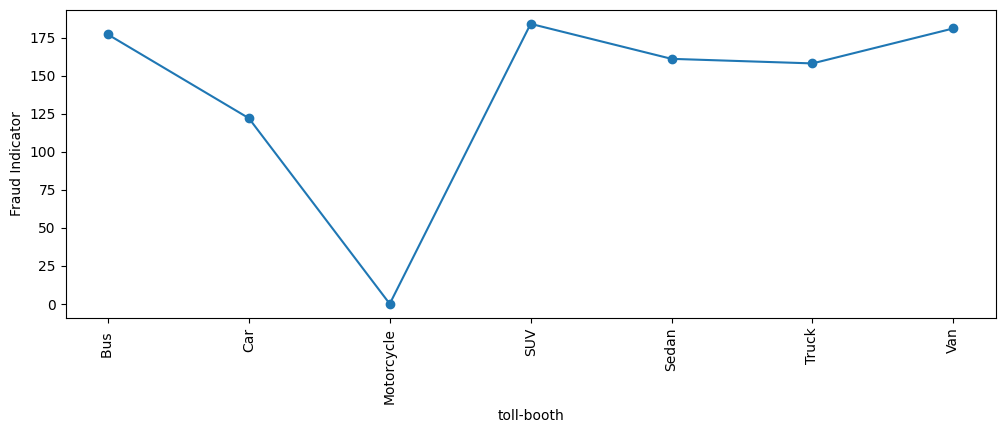

In [52]:
plt.figure(figsize=(12,4))
pd.crosstab(df['Vehicle_Type'], df['Fraud_indicator']).iloc[:, 0].plot(kind='line', marker='o')
plt.xticks(rotation=90)
plt.xlabel('toll-booth')
plt.ylabel('Fraud Indicator');

### **Transaction amount vs Amount_paid**

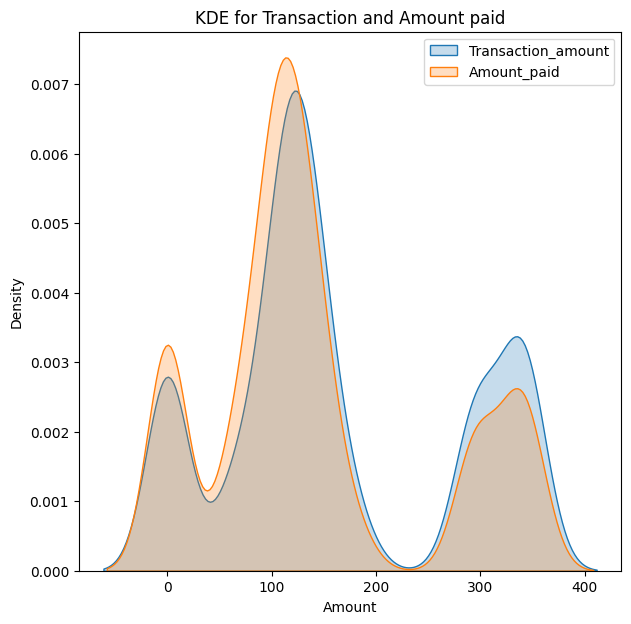

In [53]:
plt.figure(figsize=(7,7))
sns.kdeplot(data=df['Transaction_Amount'],fill=True,label ='Transaction_amount')
sns.kdeplot(data=df['Amount_paid'],fill= True,label = 'Amount_paid')
plt.xlabel('Amount')
plt.ylabel('Density')
plt.title("KDE for Transaction and Amount paid")

plt.legend()
plt.show()



### **Per Hour Fraud Amount**

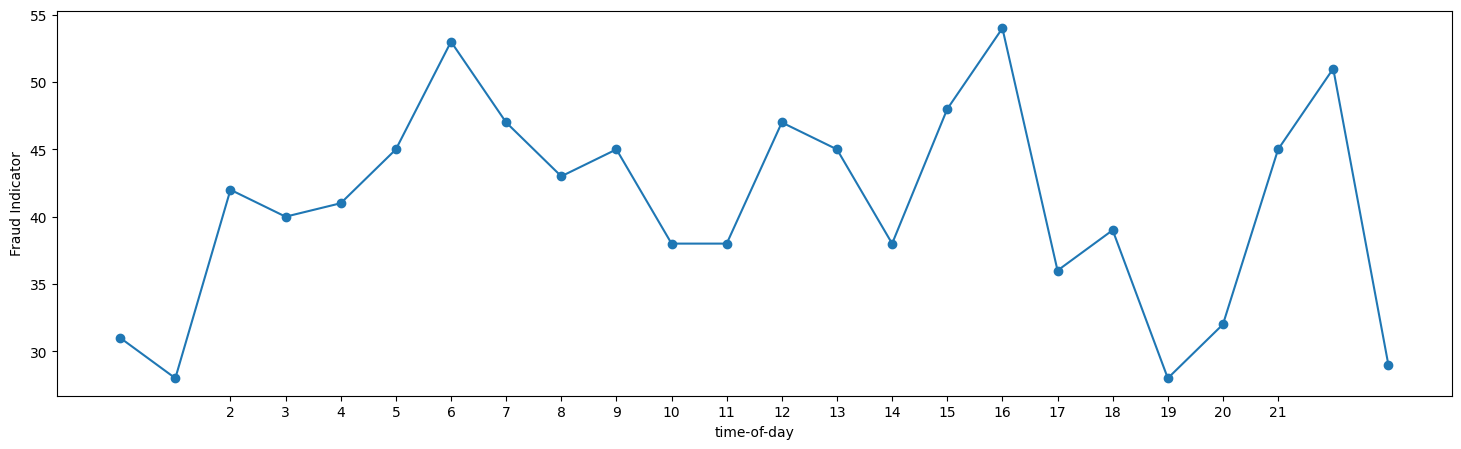

In [54]:
plt.figure(figsize=(18,5))
pd.crosstab(df['time-of-day'], df['Fraud_indicator']).iloc[:, 0].plot(kind='line', marker='o')
plt.xlabel('time-of-day')
plt.ylabel('Fraud Indicator')
plt.xticks(ticks=range(2,22));


### **Feature Engineering**

In [55]:
cols_to_drop= ['Transaction_ID', 'FastagID', 'Vehicle_Plate_Number', 'Transaction_Amount', 'Amount_paid', 'Timestamp']
df.drop(columns=cols_to_drop, inplace=True)

In [56]:
#selected features- Transaction_Amount,Amount_paid,Geographical_Location,Vehicle_Type,Lane_Type

selected_features = df[['Vehicle_Type','TollBoothID','Lane_Type','Geographical_Location','Vehicle_Dimensions','Lane_Type','state']]


In [57]:
df= pd.get_dummies(df, columns=['Vehicle_Type','TollBoothID','Lane_Type','Geographical_Location','Vehicle_Dimensions','Lane_Type','state'], drop_first=True)
df = df.applymap( lambda x : int(x) if isinstance(x, bool) else x)

<ipython-input-57-e030f264c316>:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap( lambda x : int(x) if isinstance(x, bool) else x)


In [58]:
df.head()

,Vehicle_Speed,Fraud_indicator,time-of-day,month,Vehicle_Type_Car,Vehicle_Type_Motorcycle,Vehicle_Type_SUV,Vehicle_Type_Sedan,Vehicle_Type_Truck,Vehicle_Type_Van,...,state_Haryana,state_Karnataka,state_Kerala,state_Madhya Pradesh,state_Maharashtra,state_Rajasthan,state_Tamil Nadu,state_Telangana,state_Uttar Pradesh,state_West Bengal
0,65,Fraud,11,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,78,Fraud,14,1,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,53,Not Fraud,18,1,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,92,Fraud,2,1,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
4,60,Fraud,6,1,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0


In [59]:
X= df.drop('Fraud_indicator', axis=1)

In [60]:
y1 = df['Fraud_indicator']

In [61]:
scaler = StandardScaler()
label = LabelEncoder()

In [62]:
Xs = scaler.fit_transform(X)
X = pd.DataFrame(Xs,columns=X.columns)
X

,Vehicle_Speed,time-of-day,month,Vehicle_Type_Car,Vehicle_Type_Motorcycle,Vehicle_Type_SUV,Vehicle_Type_Sedan,Vehicle_Type_Truck,Vehicle_Type_Van,TollBoothID_B-102,...,state_Haryana,state_Karnataka,state_Kerala,state_Madhya Pradesh,state_Maharashtra,state_Rajasthan,state_Tamil Nadu,state_Telangana,state_Uttar Pradesh,state_West Bengal
0,-0.171802,-0.081094,-1.423271,-0.408153,-0.408153,-0.408153,-0.408153,-0.408153,-0.408153,-0.633518,...,-0.064944,0.865015,-0.157481,-0.064944,-0.328871,-0.066479,-0.205714,-0.066479,-0.066479,-0.064944
1,0.611525,0.358998,-1.423271,2.450061,-0.408153,-0.408153,-0.408153,-0.408153,-0.408153,1.578487,...,-0.064944,0.865015,-0.157481,-0.064944,-0.328871,-0.066479,-0.205714,-0.066479,-0.066479,-0.064944
2,-0.894872,0.945789,-1.423271,-0.408153,2.450061,-0.408153,-0.408153,-0.408153,-0.408153,-0.633518,...,-0.064944,0.865015,-0.157481,-0.064944,-0.328871,-0.066479,-0.205714,-0.066479,-0.066479,-0.064944
3,1.455108,-1.401373,-1.423271,-0.408153,-0.408153,-0.408153,-0.408153,2.450061,-0.408153,-0.633518,...,-0.064944,0.865015,-0.157481,-0.064944,-0.328871,-0.066479,-0.205714,-0.066479,-0.066479,-0.064944
4,-0.473081,-0.814582,-1.423271,-0.408153,-0.408153,-0.408153,-0.408153,-0.408153,2.450061,1.578487,...,-0.064944,0.865015,-0.157481,-0.064944,-0.328871,-0.066479,-0.205714,-0.066479,-0.066479,-0.064944
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.792293,1.532579,-1.423271,-0.408153,-0.408153,-0.408153,-0.408153,2.450061,-0.408153,-0.633518,...,-0.064944,0.865015,-0.157481,-0.064944,-0.328871,-0.066479,-0.205714,-0.066479,-0.066479,-0.064944
4996,-0.232057,0.212301,-1.423271,-0.408153,-0.408153,-0.408153,-0.408153,-0.408153,2.450061,1.578487,...,-0.064944,0.865015,-0.157481,-0.064944,-0.328871,-0.066479,-0.205714,-0.066479,-0.066479,-0.064944
4997,1.515363,-0.961280,-1.132345,-0.408153,-0.408153,-0.408153,2.450061,-0.408153,-0.408153,-0.633518,...,-0.064944,0.865015,-0.157481,-0.064944,-0.328871,-0.066479,-0.205714,-0.066479,-0.066479,-0.064944
4998,-0.653849,1.239184,-1.132345,-0.408153,-0.408153,2.450061,-0.408153,-0.408153,-0.408153,1.578487,...,-0.064944,0.865015,-0.157481,-0.064944,-0.328871,-0.066479,-0.205714,-0.066479,-0.066479,-0.064944


In [63]:
y = label.fit_transform(y1)
y


array([0, 0, 1, ..., 1, 1, 0])

In [64]:
Xtrain,Xtest,ytrain,ytest= train_test_split(X,y,test_size=0.2,random_state=42)

   Accuracy  Precision    Recall        F1         Confusion Matrix
0     0.682   0.797695  0.795658  0.796675  [[59, 158], [160, 623]]


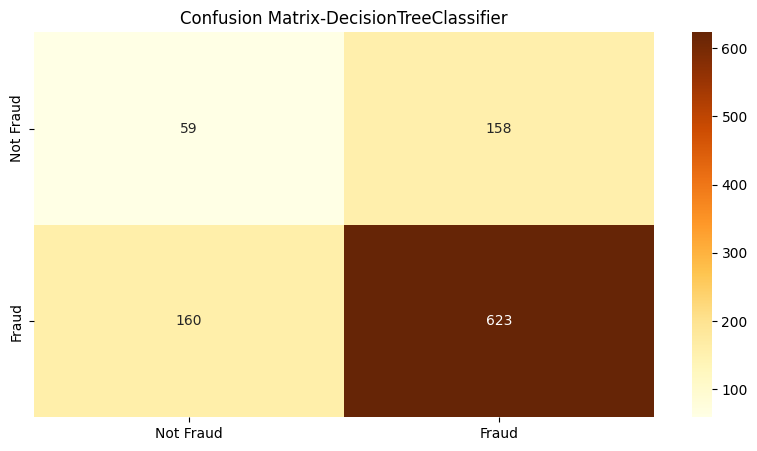

In [65]:
#Decision tree classifier
dtc = DecisionTreeClassifier()
dtc.fit(Xtrain,ytrain)
ypred = dtc.predict(Xtest)
accuracy = accuracy_score(ytest, ypred)
precision = precision_score(ytest, ypred)
recall = recall_score(ytest, ypred)
f1 = f1_score(ytest, ypred)
confusion = confusion_matrix(ytest, ypred)
Dict1 = {'Accuracy':accuracy,'Precision':precision,'Recall':recall,'F1':f1,'Confusion Matrix':[confusion]}
DecisiontreeClassifier = pd.DataFrame(Dict1)
print(DecisiontreeClassifier)
plt.figure(figsize=(10, 5))
sns.heatmap(confusion, annot=True, fmt='d', cmap='YlOrBr', xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])
plt.title(f'Confusion Matrix-DecisionTreeClassifier')
plt.show()


   Accuracy  Precision    Recall        F1        Confusion Matrix
0     0.772   0.794274  0.956577  0.867903  [[23, 194], [34, 749]]


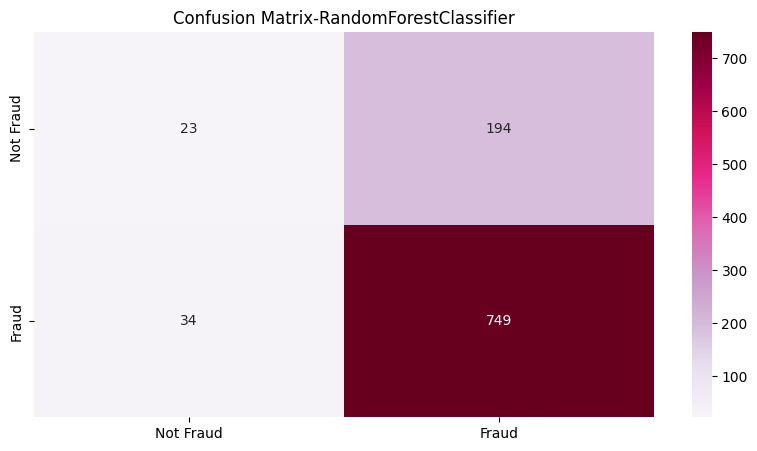

In [66]:
#Random forest Classifier
rfc = RandomForestClassifier()
rfc.fit(Xtrain,ytrain)
ypred2 = rfc.predict(Xtest)
accuracy2 = accuracy_score(ytest, ypred2)
precision2 = precision_score(ytest, ypred2)
recall2 = recall_score(ytest, ypred2)
f12 = f1_score(ytest, ypred2)
confusion2 = confusion_matrix(ytest, ypred2)
Dict2 = {'Accuracy':accuracy2,'Precision':precision2,'Recall':recall2,'F1':f12,'Confusion Matrix':[confusion2]}
RandomforestClassifier= pd.DataFrame(Dict2)
print(RandomforestClassifier)
plt.figure(figsize=(10, 5))
sns.heatmap(confusion2, annot=True, fmt='d', cmap='PuRd', xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])
plt.title(f'Confusion Matrix-RandomForestClassifier')
plt.show()

   Accuracy  Precision    Recall       F1        Confusion Matrix
0     0.764   0.794403  0.942529  0.86215  [[26, 191], [45, 738]]


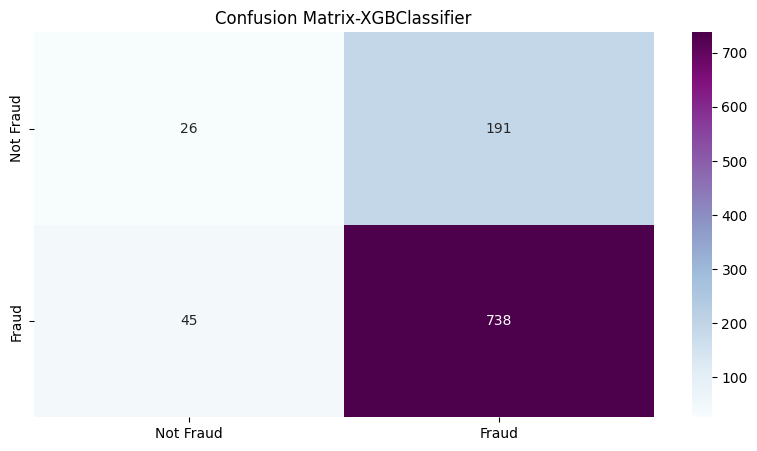

In [71]:
#knn
from sklearn.neighbors import KNeighborsClassifier
knn= KNeighborsClassifier()
knn.fit(Xtrain,ytrain)
ypred3 = knn.predict(Xtest)
accuracy3 = accuracy_score(ytest, ypred3)
precision3 = precision_score(ytest, ypred3)
recall3 = recall_score(ytest, ypred3)
f13 = f1_score(ytest, ypred3)
confusion3 = confusion_matrix(ytest, ypred3)
Dict3 = {'Accuracy':accuracy3,'Precision':precision3,'Recall':recall3,'F1':f13,'Confusion Matrix':[confusion3]}
XGBclassifier= pd.DataFrame(Dict3)
print(XGBclassifier)
plt.figure(figsize=(10, 5))
sns.heatmap(confusion3, annot=True, fmt='d', cmap='BuPu', xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])
plt.title(f'Confusion Matrix-XGBClassifier')
plt.show()

   Accuracy  Precision    Recall        F1      Confusion Matrix
0     0.782   0.782783  0.998723  0.877666  [[0, 217], [1, 782]]


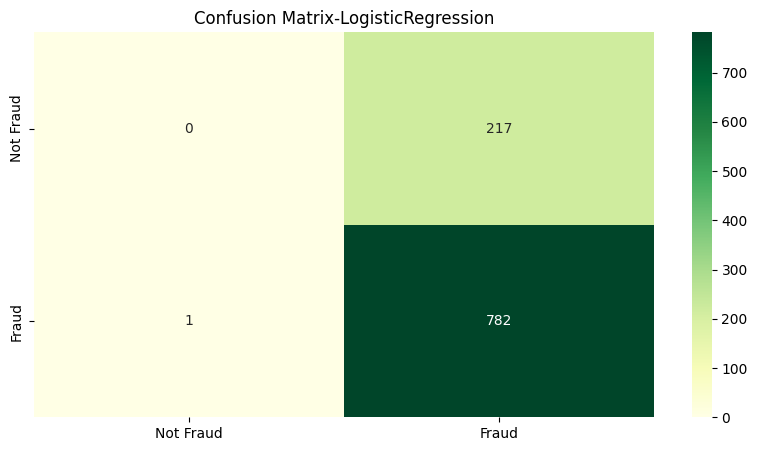

In [68]:
#Logistic Regression
lr =  LogisticRegression()
lr.fit(Xtrain,ytrain)
ypred4 = lr.predict(Xtest)
accuracy4 = accuracy_score(ytest, ypred4)
precision4 = precision_score(ytest, ypred4)
recall4 = recall_score(ytest, ypred4)
f14 = f1_score(ytest, ypred4)
confusion4 = confusion_matrix(ytest, ypred4)
Dict4 = {'Accuracy':accuracy4,'Precision':precision4,'Recall':recall4,'F1':f14,'Confusion Matrix':[confusion4]}
Logisticregression= pd.DataFrame(Dict4)
print(Logisticregression)
plt.figure(figsize=(10, 5))
sns.heatmap(confusion4, annot=True, fmt='d', cmap='YlGn', xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])
plt.title(f'Confusion Matrix-LogisticRegression')
plt.show()

   Accuracy  Precision    Recall        F1      Confusion Matrix
0     0.781   0.783133  0.996169  0.876897  [[1, 216], [3, 780]]


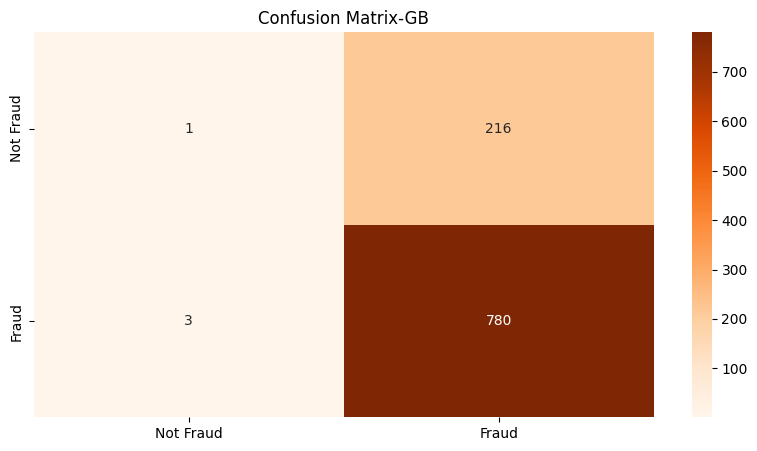

In [75]:
#SGradient Boost Classifier
from sklearn.ensemble import GradientBoostingClassifier
gb= GradientBoostingClassifier()
sv = SVC()
gb.fit(Xtrain,ytrain)
ypred5 = gb.predict(Xtest)
accuracy5 = accuracy_score(ytest, ypred5)
precision5 = precision_score(ytest, ypred5)
recall5 = recall_score(ytest, ypred5)
f15 = f1_score(ytest, ypred5)
confusion5 = confusion_matrix(ytest, ypred5)
Dict5 = {'Accuracy':accuracy5,'Precision':precision5,'Recall':recall5,'F1':f15,'Confusion Matrix':[confusion5]}
Svc= pd.DataFrame(Dict5)
print(Svc)
plt.figure(figsize=(10, 5))
sns.heatmap(confusion5, annot=True, fmt='d', cmap='Oranges', xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])
plt.title(f'Confusion Matrix-GB')
plt.show()


In [76]:
All_models = pd.DataFrame([Dict1,Dict2,Dict3,Dict4,Dict5],index=['DecisiontreeClassifier','RandomforestClassifier','KNNclassifier','Logisticregression','Gradient Boost'])

In [77]:
All_models

,Accuracy,Precision,Recall,F1,Confusion Matrix
DecisiontreeClassifier,0.682,0.797695,0.795658,0.796675,"[[[59, 158], [160, 623]]]"
RandomforestClassifier,0.772,0.794274,0.956577,0.867903,"[[[23, 194], [34, 749]]]"
KNNclassifier,0.764,0.794403,0.942529,0.862150,"[[[26, 191], [45, 738]]]"
Logisticregression,0.782,0.782783,0.998723,0.877666,"[[[0, 217], [1, 782]]]"
Gradient Boost,0.781,0.783133,0.996169,0.876897,"[[[1, 216], [3, 780]]]"


## **Since this is a Classification problem we need to go for evaluation Metrics that better understand the dataset.**
## **Here the dataset ius unbalanced. A better way is to consider F1 which is a good measure of both precision and recall which can provide us a means to select the best model.**
## **Therefore Logistic Regression is the best model for this Dataset. (Gardient boost coming in close)**